### Python module/package imports for this chapter

In [11]:
import sys, os, math, random, functools

import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim

%matplotlib inline

from IPython.display import display, HTML

### Code from previous videos (enhanced)

In [12]:
from turtle import Turtle, Terrarium

## A fractal tree

In [21]:
def fb(turtle,length):
    turtle.forward(length)
    turtle.back(length)

Turtle.fb = fb

In [22]:
def branch(turtle,length,level):
    if level == 0:
        turtle.fb(length)
    else:
        turtle.forward(length)
    
        turtle.left(45)
        branch(turtle,length/2,level-1)
        turtle.right(90)
        branch(turtle,length/2,level-1)
        turtle.left(45)
        
        turtle.back(length)

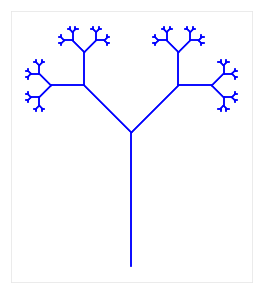

In [23]:
with Terrarium() as t:
    t1 = Turtle(t)
    t1.left(90)
    
    branch(t1,256,6)

In [24]:
# Define forward and left partial
# This is basically a shorthand for the function found in turtle.py
def F(dist):
    return functools.partial(Turtle.forward, distance = dist)
def L(ang):
    return functools.partial(Turtle.left, angle = ang)
    

In [25]:
# Define iterated (both of these functions taken from previous lessons)
def iterated(f,n):
    def iterf(arg):
        ret = arg
        for i in range(n):
            ret = f(ret)
        return ret

    return iterf

In [26]:
def FB(dist):
    return functools.partial(Turtle.fb, distance=dist)

In [33]:
def funcbranch(steps):
    newsteps = []
    
    for step in steps:
        if step.func is Turtle.FB:
            dist = step.keyword['distance']
            # Taking this from the branch definition above
            newsteps += [F(dist), L(45), F(dist/2), L(-90), F(dist/2), L(45), F(-dist)]
        else:
            newstpes += [step]
    
    return newsteps
    

UnboundLocalError: local variable 'newstpes' referenced before assignment

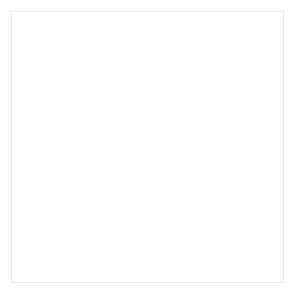

In [34]:
with Terrarium(animate=False) as t:
    t1 = Turtle(t)
    t1.left(90)

    for step in iterated(funcbranch,6)([FB(100)]):
        step(t1)